# Multivariable calculus

Notes from [brilliant.org's course](https://brilliant.org/courses/multivariable-calculus/) on Multivariable Calculus.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Define-functions" data-toc-modified-id="Define-functions-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Define functions</a></span><ul class="toc-item"><li><span><a href="#f'(x)-and-f''(x)" data-toc-modified-id="f'(x)-and-f''(x)-0.1.1"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>f'(x) and f''(x)</a></span></li><li><span><a href="#Equation-solver" data-toc-modified-id="Equation-solver-0.1.2"><span class="toc-item-num">0.1.2&nbsp;&nbsp;</span>Equation solver</a></span></li><li><span><a href="#Plot-a-function" data-toc-modified-id="Plot-a-function-0.1.3"><span class="toc-item-num">0.1.3&nbsp;&nbsp;</span>Plot a function</a></span></li><li><span><a href="#Plot-a-barchart-with-min-and-max-highlighted" data-toc-modified-id="Plot-a-barchart-with-min-and-max-highlighted-0.1.4"><span class="toc-item-num">0.1.4&nbsp;&nbsp;</span>Plot a barchart with min and max highlighted</a></span></li></ul></li></ul></li><li><span><a href="#Vectors" data-toc-modified-id="Vectors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vectors</a></span></li><li><span><a href="#Limits" data-toc-modified-id="Limits-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Limits</a></span></li><li><span><a href="#Volume-of-sphere-in-$n$-dimensions" data-toc-modified-id="Volume-of-sphere-in-$n$-dimensions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Volume of sphere in $n$ dimensions</a></span></li><li><span><a href="#Integrals-and-volumes-in-higher-dimensions" data-toc-modified-id="Integrals-and-volumes-in-higher-dimensions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Integrals and volumes in higher dimensions</a></span></li><li><span><a href="#Finding-extrema" data-toc-modified-id="Finding-extrema-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finding extrema</a></span><ul class="toc-item"><li><span><a href="#Cost-of-producing-a-box" data-toc-modified-id="Cost-of-producing-a-box-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Cost of producing a box</a></span></li><li><span><a href="#Minimizing-cost-of-producing-a-box" data-toc-modified-id="Minimizing-cost-of-producing-a-box-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Minimizing cost of producing a box</a></span><ul class="toc-item"><li><span><a href="#Analytical-solution" data-toc-modified-id="Analytical-solution-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Analytical solution</a></span></li><li><span><a href="#Numerical-solution" data-toc-modified-id="Numerical-solution-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Numerical solution</a></span></li></ul></li><li><span><a href="#Max-depth-from-a-survey" data-toc-modified-id="Max-depth-from-a-survey-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Max depth from a survey</a></span></li><li><span><a href="#Introducing-partial-derivatives" data-toc-modified-id="Introducing-partial-derivatives-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Introducing partial derivatives</a></span><ul class="toc-item"><li><span><a href="#Analytical-solution" data-toc-modified-id="Analytical-solution-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Analytical solution</a></span></li><li><span><a href="#Numerical-solution" data-toc-modified-id="Numerical-solution-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Numerical solution</a></span></li><li><span><a href="#Continuing-solution" data-toc-modified-id="Continuing-solution-5.4.3"><span class="toc-item-num">5.4.3&nbsp;&nbsp;</span>Continuing solution</a></span></li></ul></li></ul></li></ul></div>

In a nutshell, **multivariable calculus extends** the familiar **concepts of limits, derivatives, and integrals to functions with more than one independent variable**.

Multivariable calculus is much more than just a repeat of single-variable calculus, however. It's a rich subject with its own unique puzzles and surprises. It introduces new tools that solve important problems in machine learning, neural networks, engineering, quantum computing, and astrophysics, to name just a few.

### Define functions

#### f'(x) and f''(x)

In [14]:
def df(x, delta=0.00001):
    """ derivative of a function """
    return (f(x + delta) - f(x)) / delta

def ddf(x, delta=0.00001):
    """ second derivative of a function """
    return (df(x + delta) - df(x)) / delta

#### Equation solver

In [15]:
def solve(func, value, x=0.5, delta=0.00001, 
          max_tries=1000, max_err=0.1, 
          print_all=False, x_round=5):
    """ 
    equation solver
    find 'x' that maps through 'func' to 'value'
    
    moves 'x' by 'err' divided by 'slope'
    in the direction opposite to 'slope'
    until 'func(x)' - 'value' < 'max_err' 
    
    """
    for tries in range(max_tries):
        err = func(x) - value
        if abs(err) < max_err:
            print("Solved in {0:,} steps!".format(tries)) 
            return x
        slope = (func(x + delta) - func(x)) / delta
        x = x - err / slope
        if print_all:
            print(x)
    print("After {0:,} iterations, no solutions found within:\nerr = {1}"
          .format(max_tries, err))
    print("Last value of x = {0:.{1}f}".format(x, x_round))
    return

#### Plot a function

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable

def plot_xy(x=None, y=None, line_color='blue', 
            line_label="", line_label_size=16,
            line_label_xlift=1, line_label_ylift=1.05,
            points_x = None, points_y = None, 
            points_color='red', points_size=3,
            plot_title = "",
            v_line = None, h_line = None,
            sup_line_style = '--', sup_line_width = 0.5, sup_line_color = 'gray',
            x_lim = None, y_lim = None,
            create = True, show = True, ax = None,
            ):
    """
    plot funcs
    """

    def plot_lines(type, line):
        """
        plots and annotates horizontal and vertical lines
        """
        if type == 'h':
            ax.axhline(line, color=sup_line_color,
                       linestyle=sup_line_style, linewidth=sup_line_width)
            ax.text(0, line, line)
        elif type == 'v':
            ax.axvline(line, color=sup_line_color,
                       linestyle=sup_line_style, linewidth=sup_line_width)
            ax.text(line, 0, line)
        else:
            print("func 'plot_lines': Input parameter 'type' must be either 'h' or 'v'.")

    line_text_style = dict(horizontalalignment='right', 
                           verticalalignment='center',
                           fontsize=line_label_size, 
                           fontdict={'family': 'monospace'})
            
    if create == True:
        f, ax = plt.subplots(1, figsize=(6, 6))
        f.suptitle(plot_title)
        # plot axes
        ax.axvline(0, color='black', linestyle='-', linewidth=2)
        ax.set_ylabel('y', rotation=0)
        ax.axhline(0, color='black', linestyle='-', linewidth=2)
        ax.set_xlabel('x')
        ax.grid(False)

    # plot the function (if supplied in arguments)
    if x is not None and y is not None:
        ax.plot(x, y, color=line_color)
        
        ax.text(x[int(len(x) / 2)] * line_label_xlift, 
                y[int(len(y) / 2)] * line_label_ylift, 
                line_label, color=line_color, **line_text_style)
        
    # plot the points (if supplied in arguments)
    if points_x is not None and points_y is not None:
        ax.scatter(points_x, points_y, s=points_size, color=points_color)

    # plot vertical lines (if supplied)
    if isinstance(v_line, Iterable):
        for line in v_line:
            plot_lines('v', line)
    elif type(v_line) is float or type(v_line) is int \
    or type(h_line) is np.float64:
        plot_lines('v', v_line)

    # plot horizontal lines
    if isinstance(h_line, Iterable):
        for line in h_line:
            plot_lines('h', line)
    elif type(h_line) is float or type(h_line) is int \
    or type(h_line) is np.float64:
        plot_lines('h', h_line)

    # zoom axes
    if x_lim:
        ax.set_xlim(x_lim[0], x_lim[1])
    if y_lim:
        ax.set_ylim(y_lim[0], y_lim[1])


    if show == True:
        plt.show()


#### Plot a barchart with min and max highlighted

In [49]:
def plot_bars_with_minmax(series_to_plot, title="", 
                          with_minmax=True, minmax_width=0.5,
                          min_border=0.95, max_border=0.99, 
                          xlabel='x', ylabel='y',
                          large_xticks=True,
                          plot_mean=True,
                          show=True):
    """
    function to plot a gray barchart from a pandas Series, 
    plots mean (optional)
    highlights bars with extreme values (optional)
    
    param: series_to_plot -- pandas Series -- Series to plot as a barchart
           title          -- string        -- string with chart title 
           with_minmax    -- boolean       -- highlight extreme values 
           min_border     -- float         -- height limit for black min bar
           max_border     -- float         -- height limit for lightgray max bar
           minmax_width   -- float         -- width for min and max bars
           xlabel         -- string        -- label for x axis
           ylabel         -- string        -- label for y axis
           large_x_ticks  -- boolean       -- whether to plot x ticks large
           plot_mean      -- boolean       -- whether to plot mean
           show           -- boolean       -- show the plot or leave it open

    Output:          None, 
                     plots and shows barchart 
                     with mean and extremes (optional) highlighted
    """

    # create figure and axis
    f, ax = plt.subplots(1)

    # plot a gray bar chart from input Series
    plt.bar(x=series_to_plot.index,
            height=series_to_plot,
            color='gray')

    if plot_mean:
        # plot mean of the series
        ax.axhline(series_to_plot.mean(), 
                   color='black', 
                   linestyle='--', 
                   linewidth=1)
        ax.text(0, 
                series_to_plot.mean() * 1.01, 
                "Mean of counts: {0:.2f}".format(series_to_plot.mean()))

    # optional: highlight the bars with minimum values 
    if with_minmax == True:
        min_se = series_to_plot[series_to_plot == series_to_plot.min()]
        plt.bar(x=min_se.index, 
                height=min_se * min_border, 
                color='black',
                width=minmax_width)
        
        max_se = series_to_plot[series_to_plot == series_to_plot.max()]
        plt.bar(x=max_se.index, 
                height=max_se * max_border, 
                color='lightgray',
                width=minmax_width)

    # set axis parameters
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_xticks(series_to_plot.index)
    ax.set_ylabel(ylabel)
    ax.grid(False)
    if large_xticks:
        ax.tick_params('x', labelrotation=1, labelsize=20)
    
    # show the plot or leave it open
    if show:
        plt.show()

## Vectors

**Vectors play an essential role** in multivariable calculus. For now, we can think of vectors as arrows in space. A vector is **defined by its direction and its length (or magnitude)**.

Vectors **can also be thought of as collections of numbers**, making them ideal building blocks for multivariable functions.  Locating a point that sits in a 3-D space requires three numbers called **coordinates**. The vector whose tip sits at the point can also be described with these same three numbers.

<img src='img/mc_pic1.png' width='300'>

Looking at the last problem from a different perspective, we can use the two angles specifying the direction of the vector and its length to locate a point in space. This is the essential idea behind **spherical coordinates**, a topic covered in detail in [Coordinates in 3D](https://brilliant.org/practice/3d-coordinate-systems/?p=1).

## Limits

Calculus truly is the mathematics of **limits**. Without limits, we couldn't define derivatives or integrals, the two pillars of our subject. This is true no matter how many independent variables we have.

A single-variable limit can often be done with the help of continuity. Mathematically, continuity at a point $a$ means

$$ \lim \limits_{x \to a} f(x) = f(a) $$

Intuitively, it means that the graph of the function has no holes or jumps or breaks.

## Volume of sphere in $n$ dimensions

The integral was originally designed to solve planar area problems. Similarly, **multiple integrals** are very useful in solving volume problems in higher dimensions.

We can start thinking about volumes of simple objects in higher dimensions even though we don't know how to integrate in higher dimensions yet or even how to properly visualize them with our 3D minds. We can do this by analogy.

**Spheres** in $n$ dimensions are characterized by a radius. A sphere consists of all points at a fixed distance from a given center. The circle is the lowest dimensional sphere familiar to you. If it has radius $r$, its area is $\pi r^2$ Also, the sphere in 3D has volume $\frac{4} {3} \pi r^3$ if it has radius $r$.

Arguing by analogy, the pattern set by the circle and the 3D sphere seems to indicate that the **volume is proportional to $r^n$**.

To prove this requires use of **multiple integrals**, a tool we haven't yet added to our toolbox. We can, however, argue roughly this way: the radius has units of length. It is in fact the only characteristic about a sphere that has such units. Volume in $n$ dimensions, on the other hand, has units $(\text{length})^n$ (Think about square meter as a unit of area and cubic meter as a unit of volume, for example.) Since the radius is the only quantity carrying the unit of length, it stands to reason just based on unit analysis that

$$ V \propto r^n $$

(Here and throughout, $\propto$ is short for “proportional to.”)

## Integrals and volumes in higher dimensions

It may seem silly to consider volumes that are more than three-dimensional, but they play important roles in probability and physics where there could be thousands, millions, or even billions of variables.

Mathematically, if $f(x) > 0$ on $[a, b]$, then the area between the graph and the lines $y = 0$, $x = a$, $x = b$ is

$$ \int \limits_{x=a}^{x=b}f(x)dx $$

When we generalize to multiple variables, we'll have an integral sign for each new variable, or dimension. For example, the $n$-dimensional sphere
has volume

$$ x_1^2 + x_2^2 + \dots + x_n^2 = r^2 $$

has volume 

$$ \int \dots \int_{x_1^2 + x_2^2 + \dots + x_n^2 \leq r}1 dx_1 \dots dx_n \propto r^n $$

To better explain this expression, the upcoming 3D volumes unit will introduce two-variable integrals through the Riemann sum.

## Finding extrema

Finding the largest and smallest possible values of a function, or [extremizing](https://brilliant.org/wiki/optimization-problems/), is one of the most important practical applications of calculus.

Finding the optimal values of a function of several variables is even more useful since many successful real-life models depend on two or more inputs.


### Cost of producing a box

Let's start with a classic two-variable problem. Imagine a box with base length $x$ and height $y$. The box doesn't have a lid. The cost of manufacturing is directly proportional to the amount of material (or surface area) of the box.

<img src='img/mc_pic2.png' width='150'>

The surface area of the box $A$ is dependent on the base width $x$ and the height $y$.

We express this relationship explicitly as

$ A(x,y) = x^2 + 4xy $

Writing the surface area as $A(x,y)$ tells us that it is a function of both base width and height.

A company wants to produce such a box with base width at least 4 units and a height of at least 1 unit. If box material is 4 dollars per unit area, what's the cost of the cheapest box that can be produced?

**Answer**

The cost of this box would be $C(A) = 4A(4, 1) = 4(4^2 + 4\cdot 4 \cdot 1) = 128$

### Minimizing cost of producing a box

Now suppose the company wants to produce the cheapest possible box with a fixed volume of $x^2y = 4$ cubic units.

Besides being positive, there's no restriction on the base width $x$ or the height $y$ this time.

If the cost is $C(x,y) = 4x^2 + 16xy$, what is the minimum in this case?

#### Analytical solution

Since there is an additional constraint $x^2y = 4$, $x$ and $y$ are no longer independent, and we can express $y$ through $x$ as follows:

$ x^2y = 4 \implies y = \frac{4} {x^2} $

Now, we can write cost of producing a box as a function of one variable:

$ C(x) = 4x^2 + 16x \left( \frac{4} {x^2} \right) = 4x^2 + \frac{64} {x} $

In [17]:
def f(x):
    """ a function """
    return 4 * x ** 2 + 64 / x

To find its minimum, we first find its derivative $C'(x)$ and then solve the condition of minimum $C'(x) = 0$:

$ C'(x) = 8x - \frac{64} {x^2} = 0 \implies x^3 = 8 \implies x = 2 $

This is the only critical point for $C(x)$. By taking the second derivative $C''(x)$, we can verify that it is indeed a local minimum:

$ C''(x) = 8 + \frac{128} {x^3} \implies C''(2) = 8 + \frac{128} {8} > 0 $

In [18]:
def der_cost(x):
    """ derivative of the cost function """
    return 8 * x - 64 / x ** 2

Find $x$ that satisfies the condition of minimum $C'(x) = 0$: 

In [19]:
solve(der_cost, 0, x=1, 
      max_tries=1000000, max_err=0.00000000000001, 
      x_round=7)

Solved in 7 steps!


2.0

Solved in 7 steps!
x =  2.0
Minimum function value:  48.0


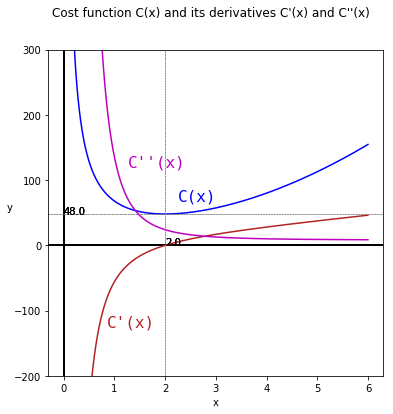

Wall time: 426 ms


In [20]:
%%time
min_x = solve(der_cost, 0, x=1, 
              max_tries=1000000, max_err=0.00000000000001, 
              x_round=7)
print("x = ", min_x)
print("Minimum function value: ", f(min_x))

x = np.linspace(0.0000001, 6, 1000)
y = 4 * x ** 2 + 64 / x
plot_xy(x, y, line_label='C(x)', line_label_ylift=1.3,
        plot_title="Cost function C(x) and its derivatives C'(x) and C''(x)", 
        y_lim=[-200, 300],
        v_line=min_x, h_line=f(min_x), 
        show=False)

ax = plt.gca()

y = 8 * x - 64 / x ** 2
plot_xy(x, y, line_color='firebrick', 
        line_label="C'(x)", line_label_xlift=0.6, line_label_ylift=-7,
        v_line=min_x, h_line=f(min_x), create=False, ax=ax, show=False)

y = 8 + 128 / x ** 3
plot_xy(x, y, line_color='m', 
        line_label="C''(x)", line_label_xlift=0.8, line_label_ylift=10,
        v_line=min_x, h_line=f(min_x), create=False, ax=ax)

$ C(x) =  4x^2 + \frac{64} {x}, 
\quad  C'(x) = 8x - \frac{64} {x^2}, \quad C''(x) = 8 + \frac{128} {x^3} $

It in fact has to be the global minimum since

$ \lim \limits_{x \to 0^+} C(x) = \infty, \quad \lim \limits_{x \to \infty} C(x) = \infty $

Plugging $ x = 2 $ into the formula for the cost function gives us

$ C(2) = 4(2)^2 + \frac{64} {2} = 16 + 32 = 48 $

#### Numerical solution

First and second derivatives can be found numerically in each point as "rise over run" using user-defined functions `df` and `ddf`:

$$ \frac{f(x + \delta) - f(x)} {\delta} $$

In [21]:
def f(x):
    """ a function """
    return 4 * x ** 2 + 64 / x

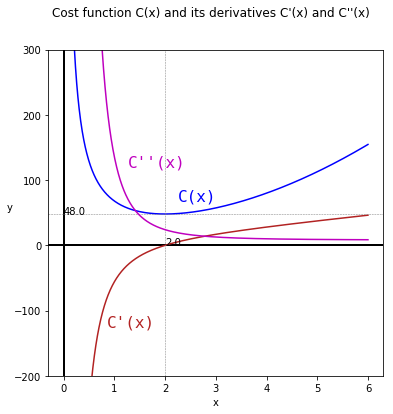

In [22]:
# create array of x
x = np.linspace(0.0000001, 6, 1000)
# calculate values of f(x)
y = f(x)
# plot
plot_xy(x, y, line_label='C(x)', line_label_ylift=1.3,
        plot_title="Cost function C(x) and its derivatives C'(x) and C''(x)", 
        y_lim=[-200, 300], 
        show=False)

# get axis that was created
ax = plt.gca()

# calculate values of f'(x)
y = df(x)
# get absolute values of f'(x)
df_abs = abs(y)
# find value of x correspodning to f'(x) closest to 0
min_x = x[np.argmin(df_abs)]
# plot
plot_xy(x, y, line_color='firebrick', 
        line_label="C'(x)", line_label_xlift=0.6, line_label_ylift=-7,
        v_line=round(min_x, 2), h_line=round(f(min_x), 2), 
        create=False, show=False, ax=ax)

# calculate values of f''(x)
y = ddf(x)
# plot
plot_xy(x, y, line_color='m', 
        line_label="C''(x)", line_label_xlift=0.8, line_label_ylift=10,
        create=False, ax=ax)

### Max depth from a survey

A constraint on $x$ and $y$ can reduce a two-variable function down to a single-variable function. In the last problem, fixing the volume tied the dimensions of the box together and effectively made the cost a function of just $x$ which we optimized using single-variable calculus.

However, there are many examples of optimization problems where we have two legitimately independent variables $x$ and $y$; i.e. there's no constraint tying them together. This calls for a new kind of tool: the **partial derivative**.

Lets look at an analogous problem first -- an expedition to chart the bottom of an unexplored lakebed.

<img src='img/mc_pic3.png' width='400'>

A series of boats move across the lake's surface, lowering bobs to measure the depth of the bed. Here's a table displaying the depths recorded by each boat in the survey.



In [24]:
import pandas as pd

survey = {
            'square_1': [130, 129, 131, 130, 130, 130],
            'square_2': [130, 78, 184, 129, 137, 130],
            'square_3': [130, 46, 199, 126, 157, 130],    
            'square_4': [130, 214, 61, 133, 101, 129],  
            'square_5': [130, 182, 76, 131, 121, 130],
            'square_6': [130, 131, 129, 130, 130, 130], 
}
survey_df = pd.DataFrame(survey)
survey_df

,square_1,square_2,square_3,square_4,square_5,square_6
0,130,130,130,130,130,130
1,129,78,46,214,182,131
2,131,184,199,61,76,129
3,130,129,126,133,131,130
4,130,137,157,101,121,130
5,130,130,130,129,130,130


Find the largest overall depth by finding the largest depth in each row, then taking the maximum of these values.

Maximum depth recorded: 214


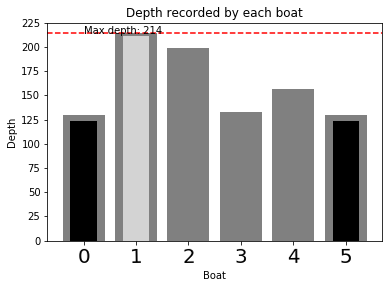

In [47]:
plot_bars_with_minmax(survey_df.max(axis=1), 
                      title="Depth recorded by each boat", 
                      xlabel='Boat', ylabel='Depth',
                      with_minmax=True, plot_mean=False, show=False)
ax = plt.gca()
max_depth = survey_df.max(axis=1).max()
print("Maximum depth recorded:", survey_df.max(axis=1).max())
ax.axhline(max_depth, linestyle='--', color='red')
ax.text(0, max_depth, "Max depth: {0}".format(max_depth))
plt.show()

In this search, we maximized row by row, and then took the maximum of these values. Notice that we would get the same answer if we maximize column by column, and then take the largest value of the results.

Maximum depth recorded: 214


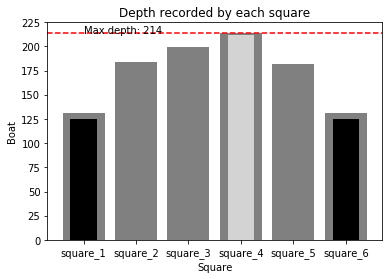

In [51]:
plot_bars_with_minmax(survey_df.max(), 
                      title="Depth recorded by each square", 
                      xlabel='Square', ylabel='Boat',
                      large_xticks=False,
                      with_minmax=True, plot_mean=False, show=False)
ax = plt.gca()
max_depth = survey_df.max().max()
print("Maximum depth recorded:", max_depth)
ax.axhline(max_depth, linestyle='--', color='red')
ax.text(0, max_depth, "Max depth: {0}".format(max_depth))
plt.show()

### Introducing partial derivatives

To find the largest depth in the table, we maximized row by row, and then took the largest of these values to find the global maximum depth.

The depth table data was actually built using the function

$ f(x, y) = 2 x y e^{1 - x^2 - y^2} \quad for ~ -2 \leq x \leq 2, 0 \leq y \leq 2 $

(not to scale) so we expect it has a maximum. Let's combine our table strategy with what we know of single-variable calculus to find it.

By analogy, let's fix one variable, say $y$, though we could also fix $x$ and get the same answer. We'll use $y_0$ to remind ourselves the value is fixed.

Find the maximum value of

$ f(x, y_0) = 2 x y_0 e^{1 - x^2 - y_0^2}
= (2 y_0 e^{1 - y_0^2})x e^{-x^2}
\quad for ~ -2 \leq x \leq 2,0 $

#### Analytical solution

When $ y_0 = 0 $, the whole function vanishes, so the maximum value in this case is just 0.

If $ y_0 \neq 0 $ then we can just maximize the single-variable function $(2 y_0 e^{1 - y_0^2})x e^{-x^2}$ for $x$ between -2 and 2.

Taking the first derivative gives us

$ \frac{d} {dx}((2 y_0 e^{1 - y_0^2}) x e^{-x^2}) 
= 
2 y_0 e^{1 - y_0^2} \left[ \frac{d} {dx} (x) e^{-x^2} + x \frac{d} {dx} (e^{-x^2}) \right] 
=~=
2 y_0 e^{1 - y_0^2} \left[ e^{-x^2} + x e^{-x^2} \frac{d} {dx} (-x^2) \right]
=
2 y_0 e^{1 - y_0^2} \left[ e^{-x^2} - 2x^2 e^{-x^2} \right]
=~=
(2 y_0 e^{1 - y_0^2}) e^{-x^2} \left[ 1 - 2x^2 \right]
$

Setting this equal to 0 and solving for $x$ gives us the critical points

$ (2 y_0 e^{1 - y_0^2}) e^{-x^2} \left[ 1 - 2x^2 \right] = 0 \implies 1 - 2x^2  = 0 \implies x = \pm \frac{1} {\sqrt 2} $, 

which are between -2 and 2.

In [54]:
def der(x):
    """ derivative """
    return 2 * np.e ** (-x ** 2) * (1 - 2 * x ** 2)

In [55]:
solve(der, 0, x=1, 
      max_tries=1000000, max_err=0.00000000000001, 
      x_round=7)

Solved in 6 steps!


0.7071067811865476

In [56]:
1 / 2 ** 0.5

0.7071067811865475

In [57]:
solve(der, 0, x=-1, 
      max_tries=1000000, max_err=0.00000000000001, 
      x_round=7)

Solved in 6 steps!


-0.7071067811865476

In [58]:
-1 / 2 ** 0.5

-0.7071067811865475

#### Numerical solution

First and second derivatives can be found numerically in each point as "rise over run" using user-defined functions `df` and `ddf`:

$$ \frac{f(x + \delta) - f(x)} {\delta} $$

$ f(x, y_0) = (2 y_0 e^{1 - y_0^2})x e^{-x^2} $, where $(2 y_0 e^{1 - y_0^2})$ represents a constant

In [70]:
def f(x):
    """ a function """
    return x * np.e ** (-x ** 2)

In [95]:
max_x = x[np.argmin(df_abs)]
max_x

0.7067067067067065

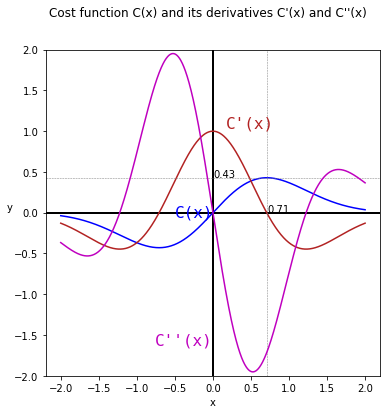

In [96]:
# create array of x
x = np.linspace(-2, 2, 1000)
# calculate values of f(x)
y = f(x)
# plot
plot_xy(x, y, line_label='C(x)', line_label_ylift=0.5,
        plot_title="Cost function C(x) and its derivatives C'(x) and C''(x)", 
        y_lim=[-2, 2], 
        show=False)

# get axis that was created
ax = plt.gca()

# calculate values of f'(x)
y = df(x)
# get absolute values of f'(x)
df_abs = abs(y)
# find value of x correspodning to f'(x) closest to 0
max_x = x[np.argmin(df_abs)]
# plot
plot_xy(x, y, line_color='firebrick', 
        line_label="C'(x)", line_label_xlift=400, line_label_ylift=1.1,
        v_line=round(max_x, 2), h_line=round(f(max_x), 2), 
        create=False, show=False, ax=ax)

# calculate values of f''(x)
y = ddf(x)
# plot
plot_xy(x, y, line_color='m', 
        line_label="C''(x)", line_label_xlift=0.8, line_label_ylift=130,
        create=False, ax=ax)

#### Continuing solution

In [100]:
x = 1 / 2 ** 0.5
f(x)

0.42888194248035344

It follows that 

$ f( \pm \frac{1} {\sqrt 2}, y_0) = \pm \sqrt 2 y_0 e ^{\frac{1} {2} - y_0^2} $

We just need to compare the positive value to the value at the endpoints: